# Project 1: SAT & ACT Analysis

## Problem Statement

For this project, we're going to take a look at aggregate SAT and ACT scores and participation rates from each state in the United States. We'll seek to identify trends in the data and combine our data analysis with outside research to identify likely factors influencing participation rates and scores in various states.

## Executive Summary

The new format for the SAT was released in March 2016. As an employee of the College Board - the organization that administers the SAT - I am part of a team that tracks statewide participation and recommends where money is best spent to improve SAT participation rates. This presentation and report is geared toward **non-technical** executives with the College Board and you will use the provided data and outside research to make recommendations about how the College Board might work to increase the participation rate in **Alaska**. 

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

In [372]:
#Imports:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

In [373]:
#os.getcwd() gets working dir
os.chdir("/Users/erinhwang/Documents/GA/LA-Flex/02-week/project_1/data")

In [374]:
#reading 2017 SAT and ACT data
act_2017 = pd.read_csv("act_2017.csv")
sat_2017 = pd.read_csv("sat_2017.csv")

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [375]:
#first 10 rows of ACT 2017
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [376]:
#first 10 rows of SAT 2017
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


#### 3. Verbally Describe Data

**Answer:**
We are given a state by state breakdown of ACT and SAT scores in the year 2017. Note that all cells are state averages besides the participation rate. 
    
    For the 2017 ACT data we have:
    1. Four subjects: English, Math, Reading, Science 
        - The ACT subjects have a score range from 1 to 36 in increments of 1
    2. Composite score
        - The ACT composite score is calculated by taking the average of the four subjects listed above
    3. Participation Rate
        - This is the participation rate of high school students taking the specified exam 
    
    For the 2017 SAT data we have:
    1. Two subjects: Reading and Writing (combined), Math
        - The SAT subjects have a score range from 200 to 800 in increments of 10
    2. Total Store
        - The SAT total score is calculated by taking summing the two subject scores listed above
    3. Particpation rate
        - This is the participation rate of high school students taking the specified exam

#### 4a. Does the data look complete? 

**Answer:**
My definition of complete data means there are no blank cells in the data; therefore, both ACT and SAT data look complete. 

In [377]:
act_2017.isnull().sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

In [378]:
sat_2017.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

*Verifying cells are not empty*


#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

**Answer:**

1. The minimum SAT math score is 52. This is impossible since the lowest possible score is 200. 

2. Here are the following min and max for each category for each test in 2017:
    - The minimum possible ACT score for english is **16.3** and maximum score is **25.5**
    - The minimum possible ACT score for math is **18.0** and maximum score is **25.3**
    - The minimum possible ACT score for reading is **18.1** and maximum score is **26.0**
    - The minimum possible ACT score for science is **2.3** and maximum score is **24.9**
    
    - The minimum possible SAT score for reading and writing is **482** and maximum score is **644**
    - The minimum possible SAT score for math is **52** and maximum score is **651**

In [379]:
#the data does not look complete, the minimum value for sat math is 52 (which is impossible)
sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [380]:
act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


In [381]:
#act stats
act_eng_min = act_2017['English'].min()
act_math_min = act_2017['Math'].min()
act_reading_min = act_2017['Reading'].min()
act_sci_min = act_2017['Science'].min()

act_eng_max = act_2017['English'].max()
act_math_max = act_2017['Math'].max()
act_reading_max = act_2017['Reading'].max()
act_sci_max = act_2017['Science'].max()



In [382]:
print(f'The minimum possible ACT score for english is {act_eng_min} and maximum score is {act_eng_max}')
print(f'The minimum possible ACT score for math is {act_math_min} and maximum score is {act_math_max}')
print(f'The minimum possible ACT score for reading is {act_reading_min} and maximum score is {act_reading_max}')
print(f'The minimum possible ACT score for science is {act_sci_min} and maximum score is {act_sci_max}')

The minimum possible ACT score for english is 16.3 and maximum score is 25.5
The minimum possible ACT score for math is 18.0 and maximum score is 25.3
The minimum possible ACT score for reading is 18.1 and maximum score is 26.0
The minimum possible ACT score for science is 2.3 and maximum score is 24.9


In [383]:
#sat stats
sat_read_write_min = sat_2017['Evidence-Based Reading and Writing'].min()
sat_math_min = sat_2017['Math'].min()


sat_read_write_max = sat_2017['Evidence-Based Reading and Writing'].max()
sat_math_max = sat_2017['Math'].max()




In [384]:
print(f'The minimum possible SAT score for reading and writing is {sat_read_write_min} and maximum score is {sat_read_write_max}')
print(f'The minimum possible SAT score for math is {sat_math_min} and maximum score is {sat_math_max}')

The minimum possible SAT score for reading and writing is 482 and maximum score is 644
The minimum possible SAT score for math is 52 and maximum score is 651


#### 5. What are your data types? 

**Answer** 
    1. The data types for ACT 2017 are:
- State: object
- Participation: object
- English: float64
- Math: float64
- Reading: float64
- Science: float64
- Composite: object


    2. The data types for SAT 2017 are:
- State: object
- Participation: object
- Evidence-Based Reading and Writing: int64
- Math: int64
- Total: int64

In [385]:
#code
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [386]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

**Answer**

**ACT**:
    1. Participation needs to be int
    2. Composite needs to be float
**SAT**:
    1. Participation needs to be int

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

- Fix any individual values preventing other columns from being the appropriate type.

The following code will change the data type of ACT and SAT participation to int. 

In [387]:
#removing % sign from participation and converting to int
act_2017['Participation'] = pd.to_numeric(act_2017['Participation'].astype(str).str[:-1], errors='coerce')
sat_2017['Participation'] = pd.to_numeric(sat_2017['Participation'].astype(str).str[:-1], errors='coerce')

In [388]:
act_2017.dtypes

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [389]:
sat_2017.dtypes

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

*Verifying data type of particpation*

Next, we must change the data type of ACT composite. But before we use .astype(), we found a string (x) in the composite column so we must correct the data. Let's find where the string contains x. 

In [390]:
#checking if there is x in the composite column of act_2017 
act_2017[act_2017['Composite'].str.contains('x')]

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,100,19.4,19.8,20.8,20.6,20.2x


The following code changes Wyoming's composite score to 20.2

In [391]:
act_2017.at[51 , 'Composite'] = 20.2

In [392]:
act_2017['Composite'] = act_2017['Composite'].astype(float)

- Display the data types again to confirm they are correct.

In [393]:
act_2017.dtypes

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [394]:
sat_2017.dtypes

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

*Verifying data types are correct*

#### 7. Rename Columns
We're going to change the names of the columns to more expressive names so that we can tell the difference the SAT columns and the ACT columns. **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

The following code will rename all columns for the ACT and SAT data. 

In [395]:
act_2017_col = {
    'State' : 'state_2017',
    'Participation': 'act_participation_2017',
    'English':'act_english_2017',
    'Math':'act_math_2017',
    'Reading':'act_reading_2017',
    'Science':'act_science_2017',
    'Composite':'act_composite_2017'
}

act_2017.rename(columns = act_2017_col, inplace = True )

In [396]:
sat_2017_col = {
    'State' : 'state_2017',
    'Participation': 'sat_participation_2017',
    'Evidence-Based Reading and Writing':'sat_read_write_2017',
    'Math':'sat_math_2017',
    'Total':'sat_total_2017'
}

sat_2017.rename(columns = sat_2017_col, inplace = True )

In [397]:
act_2017.columns

Index(['state_2017', 'act_participation_2017', 'act_english_2017',
       'act_math_2017', 'act_reading_2017', 'act_science_2017',
       'act_composite_2017'],
      dtype='object')

In [398]:
sat_2017.columns

Index(['state_2017', 'sat_participation_2017', 'sat_read_write_2017',
       'sat_math_2017', 'sat_total_2017'],
      dtype='object')

*Verifying columns names have been renamed*

#### 8. Create a data dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|act_state_2017|object|ACT 2017|State Name| 
|act_participation_2017|int|ACT 2017|Average ACT Participation Rate| 
|act_english_2017|float|ACT 2017|Average ACT English Score| 
|act_math_2017|float|ACT 2017|Average ACT Math Score| 
|act_reading_2017|float|ACT 2017|Average ACT Reading Score| 
|act_science_2017|float|ACT 2017|Average ACT Science Score| 
|act_composite_2017|float|ACT 2017|Average ACT Composite Score| 
|sat_state_2017|object|SAT 2017|State Name| 
|sat_participation_2017|int|SAT 2017|Average SAT Participation Rate| 
|sat_read_write_2017|float|SAT 2017|Average SAT Reading and Writing Score| 
|sat_math_2017|float|SAT 2017|Average SAT Math Score| 
|sat_total_2017|float|SAT 2017|Average SAT Total Score| 




#### 9. Drop unnecessary rows

In [399]:
#Dropping National row from act_2017
act_2017.drop([0], inplace = True)

In [400]:
act_2017.shape

(51, 7)

In [401]:
sat_2017.shape

(51, 5)

*Verifying shapes of both data are equal*

#### 10. Merge Dataframes

My merged dataframe is called `df_2017`

In [402]:
#merging both 2017 dataframes and calling it df_2017
df_2017 = act_2017.merge(sat_2017, on='state_2017', how = 'outer')

In [403]:
df_2017.dtypes

state_2017                 object
act_participation_2017      int64
act_english_2017          float64
act_math_2017             float64
act_reading_2017          float64
act_science_2017          float64
act_composite_2017        float64
sat_participation_2017      int64
sat_read_write_2017         int64
sat_math_2017               int64
sat_total_2017              int64
dtype: object

#### 11. Save your cleaned, merged dataframe

Saving our `df_2017` data as `combined_2017.csv`.

In [404]:
df_2017.to_csv('combined_2017.csv', encoding='utf-8', index=False)

In [405]:
os.getcwd() 
#imported to this working directory 

'/Users/erinhwang/Documents/GA/LA-Flex/02-week/project_1/data'

## 2018 Data Import and Cleaning

The following code repeats the same process as importing and cleaning data for 2017

In [406]:
#reading 2018 csv into pandas dataframe
act_2018 = pd.read_csv('ACT_2018.csv')
sat_2018 = pd.read_csv('SAT_2018.csv')

In [407]:
#find data type
act_2018.dtypes

State             object
Participation     object
Composite        float64
dtype: object

In [408]:
#find data type
sat_2018.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [409]:
#shape of ACT 2018
act_2018.shape

(52, 3)

In [410]:
#shape of SAT 2018
sat_2018.shape

(51, 5)

In [411]:
#checking for completion
act_2018.isnull().mean()

State            0.0
Participation    0.0
Composite        0.0
dtype: float64

In [412]:
#checking for completion
sat_2018.isnull().mean()

State                                 0.0
Participation                         0.0
Evidence-Based Reading and Writing    0.0
Math                                  0.0
Total                                 0.0
dtype: float64

In [413]:
#We first need to remove the % sign from both particpation columns of 2018 ACT and SAT
act_2018['Participation'] = pd.to_numeric(act_2018['Participation'].astype(str).str[:-1], errors='coerce')
sat_2018['Participation'] = pd.to_numeric(sat_2018['Participation'].astype(str).str[:-1], errors='coerce')

In [414]:
#Verifying participation isn't an object anymore
act_2018.dtypes

State             object
Participation      int64
Composite        float64
dtype: object

In [415]:
#Verifying participation isn't an object anymore
sat_2018.dtypes

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [416]:
act_2018.columns

Index(['State', 'Participation', 'Composite'], dtype='object')

In [417]:
sat_2018.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [418]:
#Renaming columns 
act_2018_col = {
    'State': 'state_2018',
    'Participation': 'act_participation_2018',
    'Composite': 'act_composite_2018',
}

act_2018.rename(columns = act_2018_col, inplace = True)

In [419]:
#Renaming columns 
sat_2018_col = {
    'State': 'state_2018',
    'Participation': 'sat_participation_2018',
    'Evidence-Based Reading and Writing': 'sat_read_write_2018',
    'Math': 'sat_math_2018',
    'Total': 'sat_total_2018',
}

sat_2018.rename(columns = sat_2018_col, inplace = True)

In [420]:
act_2018.columns

Index(['state_2018', 'act_participation_2018', 'act_composite_2018'], dtype='object')

In [421]:
sat_2018.columns

Index(['state_2018', 'sat_participation_2018', 'sat_read_write_2018',
       'sat_math_2018', 'sat_total_2018'],
      dtype='object')

*Verifying*

We need to drop Main from act_2018 since its a duplicate

In [422]:
act_2018.drop([19], inplace = True)

In [423]:
act_2018.shape

(51, 3)

*Verifying duplicate has been dropped*

We also need to convert the District of columbia to District of Columbia from act_2018 so we can merge them correctly moving forward

In [424]:
act_2018.at[8 , 'state_2018'] = 'District of Columbia'

Merging 2018 ACT and SAT to call it `df_2018`

In [425]:
df_2018 = act_2018.merge(sat_2018, on='state_2018', how = 'outer')

In [426]:
#verifying renamed columns are merged
df_2018.dtypes

state_2018                 object
act_participation_2018      int64
act_composite_2018        float64
sat_participation_2018      int64
sat_read_write_2018         int64
sat_math_2018               int64
sat_total_2018              int64
dtype: object

Turning `df_2018` into a csv called `combined_2018.cvs`

In [427]:
df_2018.to_csv('combined_2018.csv', encoding='utf-8', index=False)

#### Combining 2017 and 2018 data into a single dataframe

Save the contents of this merged dataframe as `final.csv`.

**We will use this combined dataframe `final.csv` for the remainder of the project**.

In [428]:
#renaming key column (state) before we merge 
df_2017.rename(columns ={'state_2017': 'state'}, inplace = True)
df_2018.rename(columns ={'state_2018': 'state'}, inplace = True)

In [429]:
#merged dataframe is called final
final = df_2018.merge(df_2017, on='state', how = 'outer')

In [430]:
final.head(2)

,state,act_participation_2018,act_composite_2018,sat_participation_2018,sat_read_write_2018,sat_math_2018,sat_total_2018,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2017,sat_read_write_2017,sat_math_2017,sat_total_2017
0,Alabama,100,19.1,6,595,571,1166,100,18.9,18.4,19.7,19.4,19.2,5,593,572,1165
1,Alaska,33,20.8,43,562,544,1106,65,18.7,19.8,20.4,19.9,19.8,38,547,533,1080


*verifying*

In [431]:
final.isnull().mean()

state                     0.0
act_participation_2018    0.0
act_composite_2018        0.0
sat_participation_2018    0.0
sat_read_write_2018       0.0
sat_math_2018             0.0
sat_total_2018            0.0
act_participation_2017    0.0
act_english_2017          0.0
act_math_2017             0.0
act_reading_2017          0.0
act_science_2017          0.0
act_composite_2017        0.0
sat_participation_2017    0.0
sat_read_write_2017       0.0
sat_math_2017             0.0
sat_total_2017            0.0
dtype: float64

In [432]:
#creating .csv file of final
final.to_csv('final.csv', encoding='utf-8', index=False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [433]:
#transposing
final.describe().T

,count,mean,std,min,25%,50%,75%,max
act_participation_2018,51.0,61.725490,34.037085,7.0,28.50,66.0,100.00,100.0
act_composite_2018,51.0,21.496078,2.111583,17.7,19.95,21.3,23.65,25.6
sat_participation_2018,51.0,45.745098,37.314256,2.0,4.50,52.0,77.50,100.0
sat_read_write_2018,51.0,563.686275,47.502627,480.0,534.50,552.0,610.50,643.0
sat_math_2018,51.0,556.235294,47.772623,480.0,522.50,544.0,593.50,655.0
sat_total_2018,51.0,1120.019608,94.155083,977.0,1057.50,1098.0,1204.00,1298.0
act_participation_2017,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_english_2017,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_math_2017,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_reading_2017,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [434]:
#function to calculate std
def calc_std(list_numbers):
    sum_sqr = 0
    avg = sum(list_numbers)/len(list_numbers)
    for x in list_numbers:
        parenthesis = (x - avg)**2
        sum_sqr = sum_sqr + parenthesis
    before_square_root = (sum_sqr) * (1/len(list_numbers))
    std = before_square_root**0.5
    
    return std

Verifying STD is correct

In [435]:
my_list = [1,2,3,4,5]
calc_std(my_list)


1.4142135623730951

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [436]:
#Code:
#for numeric in the final 
#insert std function 
for col in list(final):
    if final[col].dtype != 'O':
        std = calc_std(final[col])
        print(f'The standard deviation for {col} is {std}')


The standard deviation for act_participation_2018 is 33.70173582041031
The standard deviation for act_composite_2018 is 2.090779082141178
The standard deviation for sat_participation_2018 is 36.946619223539415
The standard deviation for sat_read_write_2018 is 47.03460978357609
The standard deviation for sat_math_2018 is 47.30194550378352
The standard deviation for sat_total_2018 is 93.22742384464433
The standard deviation for act_participation_2017 is 31.824175751231806
The standard deviation for act_english_2017 is 2.3304876369363363
The standard deviation for act_math_2017 is 1.9624620273436781
The standard deviation for act_reading_2017 is 2.0469029314842646
The standard deviation for act_science_2017 is 3.1511078954644076
The standard deviation for act_composite_2017 is 2.000786081581989
The standard deviation for sat_participation_2017 is 34.92907076664508
The standard deviation for sat_read_write_2017 is 45.21697020437866
The standard deviation for sat_math_2017 is 84.07255521608

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

**Answer:**
- Numpy's SD method is slightly lower since it removes 1 degree of freedom whereas Pandas SD method doesn't remove 1 degree of freedom

In [437]:
#numpy version
for col in list(final):
    if final[col].dtype != 'O':
        std = np.std(final[col])
        print(f'The standard deviation for {col} is {std}')
#identical 

The standard deviation for act_participation_2018 is 33.70173582041031
The standard deviation for act_composite_2018 is 2.090779082141178
The standard deviation for sat_participation_2018 is 36.946619223539415
The standard deviation for sat_read_write_2018 is 47.03460978357609
The standard deviation for sat_math_2018 is 47.30194550378352
The standard deviation for sat_total_2018 is 93.22742384464433
The standard deviation for act_participation_2017 is 31.824175751231806
The standard deviation for act_english_2017 is 2.3304876369363363
The standard deviation for act_math_2017 is 1.9624620273436781
The standard deviation for act_reading_2017 is 2.0469029314842646
The standard deviation for act_science_2017 is 3.151107895464408
The standard deviation for act_composite_2017 is 2.000786081581989
The standard deviation for sat_participation_2017 is 34.92907076664508
The standard deviation for sat_read_write_2017 is 45.21697020437866
The standard deviation for sat_math_2017 is 84.072555216082

In [438]:
#pandas version
for col in list(final):
    if final[col].dtype != 'O':
        std = final[col].std()
        print(f'The standard deviation for {col} is {std}')
#pandas STD is slightly bigger

The standard deviation for act_participation_2018 is 34.03708473496081
The standard deviation for act_composite_2018 is 2.111583366510896
The standard deviation for sat_participation_2018 is 37.31425633039196
The standard deviation for sat_read_write_2018 is 47.50262737831599
The standard deviation for sat_math_2018 is 47.77262322095955
The standard deviation for sat_total_2018 is 94.15508275097599
The standard deviation for act_participation_2017 is 32.14084201588683
The standard deviation for act_english_2017 is 2.35367713980303
The standard deviation for act_math_2017 is 1.9819894936505533
The standard deviation for act_reading_2017 is 2.0672706264873146
The standard deviation for act_science_2017 is 3.182462975155452
The standard deviation for act_composite_2017 is 2.020694891154341
The standard deviation for sat_participation_2017 is 35.276632270013046
The standard deviation for sat_read_write_2017 is 45.66690138768932
The standard deviation for sat_math_2017 is 84.90911865855486


#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

**Answer Part 1**

The states with the highest SAT participation rate (100%) in 2017 are:
    1. Connecticut
    2. Delaware
    3. DC
    4. Michigan 
The states with the lowest SAT participation rate (2%) in 2017 are:
    1. Iowa
    2. Mississippi
    3. North Dakota 
The states with the highest SAT participation rate (100%) in 2018 are:
    1. Connecticut
    2. Delaware
    3. Colorado
    4. Michigan 
    5. Idaho
The state with the lowest SAT participation rate (2%) in 2018 is:
    1. North Dakota 
The states with the highest ACT participation rate (100%) in 2017 are:
    1. Alabama
    2. Arkansas
    3. Colorado
    4. Kentucky
    5. Louisiana
    6. Minnesota
    7. Mississippi
    8. Missouri
    9. Montana
    10. Nevada
    11. North Carolina
    12. Oklahoma
    13. South Carolina
    14. Tennessee
    15. Utah
    16. Wisconsin
    17. Wyoming
The states with the lowest ACT participation rate (8%) in 2017 is:
    1. Maine
The states with the highest ACT participation rate (100%) in 2018 are:
    1. Alabama
    2. Arkansas
    3. Kentucky
    4. Louisiana
    5. Mississippi
    6. Missouri
    7. Montana
    8. Nebraska
    9. Nevada
    10. North Carolina
    11. Ohio
    12. Oklahoma
    13. South Carolina
    14. Tennessee
    15. Utah
    16. Wisconsin
    17. Wyoming
 
The state with the lowest ACT participation rate (8%) in 2018 is:
    1. Maine

In [439]:
#finding max of sat rate 2017
(final['sat_participation_2017']).max()

100

In [440]:
#2017 SAT highest participation state (100%)
final[final['sat_participation_2017'] == 100]['state']

6              Connecticut
7                 Delaware
8     District of Columbia
22                Michigan
Name: state, dtype: object

In [441]:
#finding min of sat rate 2017
(final['sat_participation_2017']).min()

2

In [442]:
#2017 SAT lowest participation state (2%)
final[final['sat_participation_2017'] == 2]['state']

15            Iowa
24     Mississippi
34    North Dakota
Name: state, dtype: object

In [443]:
#finding max of sat rate 2018
(final['sat_participation_2018']).max()

100

In [444]:
#2018 SAT highest participation state (100%)
final[final['sat_participation_2018'] == 100]['state']

5        Colorado
6     Connecticut
7        Delaware
12          Idaho
22       Michigan
Name: state, dtype: object

In [445]:
#finding min of sat rate 2018
(final['sat_participation_2018']).min()

2

In [446]:
#2018 SAT highest participation state (2%)
final[final['sat_participation_2018'] == 2]['state']

34    North Dakota
Name: state, dtype: object

In [447]:
#finding min act rate 2017
(final['act_participation_2017']).min()

8

In [448]:
#finding max act rate 2017
(final['act_participation_2017']).max()

100

In [449]:
#2017 ACT highest participation state (100%)
final[final['act_participation_2017'] == 100]['state']

0            Alabama
3           Arkansas
5           Colorado
17          Kentucky
18         Louisiana
23         Minnesota
24       Mississippi
25          Missouri
26           Montana
28            Nevada
33    North Carolina
36          Oklahoma
40    South Carolina
42         Tennessee
44              Utah
49         Wisconsin
50           Wyoming
Name: state, dtype: object

In [450]:
#2017 ACT lowest participation state (8%)
final[final['act_participation_2017'] == 8]['state']

19    Maine
Name: state, dtype: object

In [451]:
#finding min act rate 2018
(final['act_participation_2018']).min()

7

In [452]:
#finding max act rate 2018
(final['act_participation_2018']).max()

100

In [453]:
#2018 ACT highest participation state (100%)
final[final['act_participation_2018'] == 100]['state']

0            Alabama
3           Arkansas
17          Kentucky
18         Louisiana
24       Mississippi
25          Missouri
26           Montana
27          Nebraska
28            Nevada
33    North Carolina
35              Ohio
36          Oklahoma
40    South Carolina
42         Tennessee
44              Utah
49         Wisconsin
50           Wyoming
Name: state, dtype: object

In [454]:
#2018 ACT lowest participation state (7%)
final[final['act_participation_2018'] == 7]['state']

19    Maine
Name: state, dtype: object

**Answer Part 2**

The state with the lowest SAT total score in 2017 is:
    1. DC (950)
The state with the highest SAT total score in 2017 is:
    1. Minnesota (1295)
The state with the lowest SAT total score in 2018 is:
    1. DC (977)
The state with the highest SAT total score in 2018 is:
    1. Minnesota (1298)
The state with the lowest ACT composite score in 2017 is:
    1. Nevada (17.8)
The state with the highest ACT composite score in 2017 is:
    1. New Hampshire (25.5)
The state with the lowest ACT composite score in 2018 is:
    1. Nevada (17.7)
The state with the highest ACT composite score in 2018 is:
    1. Connecticut (25.6)

In [455]:
#find min sat total 2017
(final['sat_total_2017']).min()

950

In [456]:
#find max sat total 2017
(final['sat_total_2017']).max()

1295

In [457]:
#stae with the lowest sat score in 2017
final[final['sat_total_2017'] ==950]['state']

8    District of Columbia
Name: state, dtype: object

In [458]:
#state with the highest sat score in 2017
final[final['sat_total_2017'] ==1295]['state']

23    Minnesota
Name: state, dtype: object

In [459]:
#find min sat total 2018
(final['sat_total_2018']).min()

977

In [460]:
#find max sat total 2018
(final['sat_total_2018']).max()

1298

In [461]:
#state with the lowest sat score in 2018
final[final['sat_total_2018'] ==977]['state']

8    District of Columbia
Name: state, dtype: object

In [462]:
#state with the highest sat score in 2018
final[final['sat_total_2018'] ==1298]['state']

23    Minnesota
Name: state, dtype: object

In [463]:
#finding min act composite 2017
(final['act_composite_2017']).min()

17.8

In [464]:
#finding max act composite 2017
(final['act_composite_2017']).max()

25.5

In [465]:
#state with the lowest ACT composite score in 2017
final[final['act_composite_2017'] == 17.8]['state']

28    Nevada
Name: state, dtype: object

In [466]:
#state with the highest ACT composite score in 2017
final[final['act_composite_2017'] == 25.5]['state']

29    New Hampshire
Name: state, dtype: object

In [467]:
#find min act composite 2018
(final['act_composite_2018']).min()

17.7

In [468]:
#find max act composite 2018
(final['act_composite_2018']).max()

25.6

In [469]:
#state with the lowest ACT composite score in 2018
final[final['act_composite_2018'] == 17.7]['state']

28    Nevada
Name: state, dtype: object

In [470]:
#state with the highest ACT composite score in 2018
final[final['act_composite_2018'] == 25.6]['state']

6    Connecticut
Name: state, dtype: object

Do states with 100% participation have changes in rates year to year (and vice versa)? 

**Answer Part 3**:

1. Colorado's particpation rate for the SAT skyrocketed from 11% to 100%
2. Idaho's particpation rate for the SAT increased from 93% to 100%
3. DC SAT participation rate dropped from 100% to 92%
4. Nebraska's ACT particpation rate increased from 84% to 100%
5. Ohio's ACT particpation rate increased from 75% to 100%
6. Colorado's ACT particpation rate decreased from 100% to 30%
7. Minnesota's ACT particpation rate decreased from 100% to 99%

In [471]:
#creating list of high rate states
sat_part_high_2017 = list(final[final['sat_participation_2017'] == 100]['state'])
sat_part_high_2018 = list(final[final['sat_participation_2018'] == 100]['state'])
act_part_high_2017 = list(final[final['act_participation_2017'] == 100]['state'])
act_part_high_2018 = list(final[final['act_participation_2018'] == 100]['state'])

In [472]:
set(sat_part_high_2018) - set(sat_part_high_2017) #equals to states in 2018 list that arent in 2017 
#returns colorado and idaho 
final[final['state'] == 'Colorado']['sat_participation_2017']
final[final['state'] == 'Idaho']['sat_participation_2017']

12    93
Name: sat_participation_2017, dtype: int64

In [473]:
set(sat_part_high_2017) - set(sat_part_high_2018) #states in 2017 list that are not in 2018 list
#means participation rate decreased #returns DC
final[final['state'] == 'District of Columbia']['sat_participation_2018']

8    92
Name: sat_participation_2018, dtype: int64

In [474]:
set(act_part_high_2018) - set(act_part_high_2017) #states that appeared in 2018 that are not in 2017
#these states increased their particpation rate.. returns nebraska and ohio 
final[final['state'] == 'Nebraska']['act_participation_2017']
final[final['state'] == 'Ohio']['act_participation_2017']

35    75
Name: act_participation_2017, dtype: int64

In [475]:
set(act_part_high_2017)- set(act_part_high_2018) #states in 2017 that dont appear in 2018... particpation rates drop
#returns colorado and minnesota 
final[final['state'] == 'Colorado']['act_participation_2018']
final[final['state'] == 'Minnesota']['act_participation_2018']

23    99
Name: act_participation_2018, dtype: int64

Go by year and see if there are nay states that have **both** test participations greater than 50%

**Answer Part 4**:

The states that had participation rates greater than 50% on both tests for the year 2017 are:
    1. Florida
    2. Georgia
    3. Hawaii
The states that had participation rates greater than 50% on both tests for the year 2018 are:
    1. Florida
    2. Georgia
    3. Hawaii
    4. North Carolina
    5. South Carolina 

In [476]:
final[(final['act_participation_2017'] > 50) & (final['sat_participation_2017'] > 50)]['state']

9     Florida
10    Georgia
11     Hawaii
Name: state, dtype: object

In [477]:
final[(final['act_participation_2018'] > 50) & (final['sat_participation_2018'] > 50)]['state']

9            Florida
10           Georgia
11            Hawaii
33    North Carolina
40    South Carolina
Name: state, dtype: object

### I'm gonna also select states that have a particpation rate of less than 45% on both exams for every year

For 2017:
1. Oregon

For 2018:
1. Alaska

**Alaska is the only current state to have participation rates lower than the national average**

In [533]:
#this is important
#alaska is the only current state in 2018 to have both rates lower than the average
final[(final['act_participation_2018'] < act_2018_particpation_avg) & (final['sat_participation_2018'] < sat_2018_particpation_avg)]['state']

1    Alaska
Name: state, dtype: object

In [479]:
#returns state with both rates being less than 45 in 2017
final[(final['act_participation_2017'] < 45) & (final['sat_participation_2017'] < 45)]['state']

37    Oregon
Name: state, dtype: object

In [480]:
#calculating nation rate average for 2018
act_2018_particpation_avg = (final['act_participation_2018']).mean()
sat_2018_particpation_avg = (final['sat_participation_2018']).mean()

In [481]:
#nation average rate for 2018
print(act_2018_particpation_avg)
print(sat_2018_particpation_avg)

61.72549019607843
45.745098039215684


In [483]:
final[final['state']=='Alaska']

#I probably want to talk about Alaska 

,state,act_participation_2018,act_composite_2018,sat_participation_2018,sat_read_write_2018,sat_math_2018,sat_total_2018,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2017,sat_read_write_2017,sat_math_2017,sat_total_2017
1,Alaska,33,20.8,43,562,544,1106,65,18.7,19.8,20.4,19.9,19.8,38,547,533,1080


### Colorado is interesting because their SAT particpation rate skyrocketed while their ACT plummeted

In [484]:
final[final['state'] == 'Colorado']

#new law occured for colorado

,state,act_participation_2018,act_composite_2018,sat_participation_2018,sat_read_write_2018,sat_math_2018,sat_total_2018,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2017,sat_read_write_2017,sat_math_2017,sat_total_2017
5,Colorado,30,23.9,100,519,506,1025,100,20.1,20.3,21.2,20.9,20.8,11,606,595,1201


## Visualize the data

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

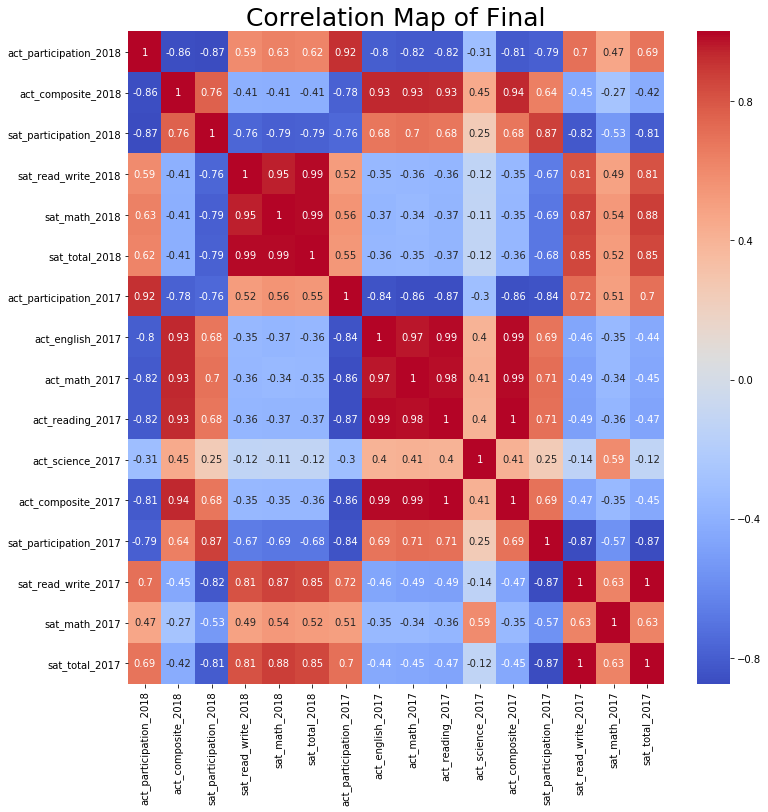

In [485]:
plt.figure(figsize = (12, 12))
plt.title('Correlation Map of Final', fontsize = 25)
sns.heatmap(final.corr(), cmap = 'coolwarm', annot = True)

#### Define a custom function to subplot histograms

In [486]:
#function to create subplots
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):

    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].set_title(list_of_titles[i])
        ax[i].hist(dataframe[column], bins = 30, alpha = 0.5, label = list_of_xlabels[i]) # feel free to add more settings
        ax[i].vlines(x = np.mean(dataframe[column]), ymin = 0, ymax = 10, color = 'r')
        plt.tight_layout()
        #ax[i].legend(loc = 'upper left')
        # Set titles, labels, etc here for each subplot
        

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

# Participation rates for SAT & ACT

<Figure size 1080x1080 with 0 Axes>

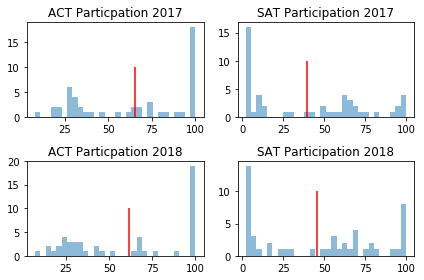

In [487]:
#rate for sat and act 2017 and 2018
list_col = ['act_participation_2017','sat_participation_2017', 'act_participation_2018','sat_participation_2018']
list_title = ['ACT Particpation 2017', 'SAT Participation 2017', 'ACT Particpation 2018', 'SAT Participation 2018']
list_xlabels = ['ACT Particpation 2017', 'SAT Participation 2017', 'ACT Particpation 2018', 'SAT Participation 2018']

plt.figure(figsize = (15, 15))
subplot_histograms(final, list_col, list_title, list_xlabels)

# Math scores for SAT & ACT

<Figure size 1080x1080 with 0 Axes>

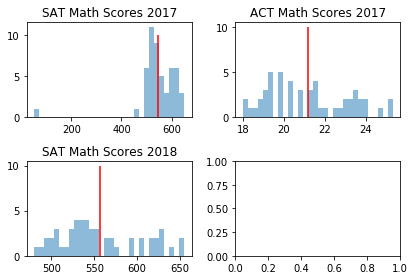

In [488]:
list_col = ['sat_math_2017','act_math_2017', 'sat_math_2018']
list_title = ['SAT Math Scores 2017', 'ACT Math Scores 2017', 'SAT Math Scores 2018']
list_xlabels = ['SAT Math Scores 2017', 'ACT Math Scores 2017', 'SAT Math Scores 2018']

plt.figure(figsize = (15, 15))
subplot_histograms(final, list_col, list_title, list_xlabels)

# Reading/Verbal Scores for SAT & ACT

<Figure size 1080x1080 with 0 Axes>

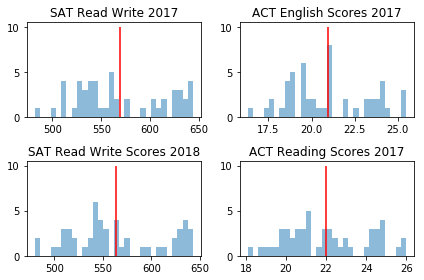

In [489]:
list_col = ['sat_read_write_2017','act_english_2017','sat_read_write_2018', 'act_reading_2017']
list_title = ['SAT Read Write 2017', 'ACT English Scores 2017', 'SAT Read Write Scores 2018', 'ACT Reading Scores 2017']
list_xlabels = ['SAT Read Write 2017', 'ACT English Scores 2017', 'SAT Read Write Scores 2018', 'ACT Reading Scores 2017']

plt.figure(figsize = (15, 15))
subplot_histograms(final, list_col, list_title, list_xlabels)

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

# SAT vs ACT:

### The scatter plots that compared SAT against ACT barely have correlation. It is safe to say states with high scores in SAT have low scores in ACT (and vice versa). 

# (SAT vs SAT) & (ACT vs ACT):

### There is more positive correlation for scatter plots that compare to the same exams. But it is safe to say few states that took the SAT in 2017 had higher scores than that of 2018. 

In [490]:
# creaeted function to create scatter
def subplot_scatter(dataframe, list_of_tuples, title, xlabel, ylabel):
    plt.title(title)
    plt.scatter(dataframe[list_of_tuples[0]], dataframe[list_of_tuples[1]], alpha = 0.5) # feel free to add more settings
    plt.ylabel(ylabel, fontsize = 10)
    plt.xlabel(xlabel, fontsize = 10);
    plt.tight_layout()
    plt.show();
        #ax[i].legend(loc = 'upper left')
        # Set titles, labels, etc here for each subplot
        

# SAT vs ACT Math- 2017

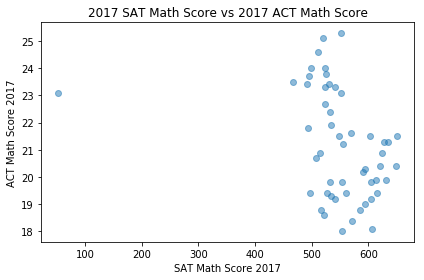

In [491]:
list_of_tuples = ['sat_math_2017', 'act_math_2017' ]
title = '2017 SAT Math Score vs 2017 ACT Math Score'
xlabel = 'SAT Math Score 2017'
ylabel = 'ACT Math Score 2017'

subplot_scatter(final, list_of_tuples, title, xlabel, ylabel)

# SAT vs ACT Verbal/Reading- 2017

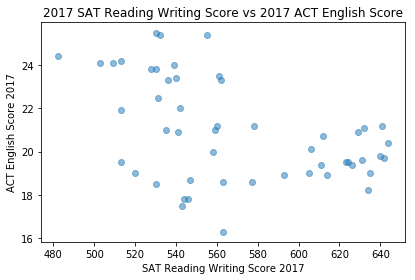

In [492]:
list_of_tuples = ['sat_read_write_2017', 'act_english_2017' ]
title = '2017 SAT Reading Writing Score vs 2017 ACT English Score'
xlabel = 'SAT Reading Writing Score 2017'
ylabel = 'ACT English Score 2017'

subplot_scatter(final, list_of_tuples, title, xlabel, ylabel)



# SAT vs ACT Verbal/Reading- 2017

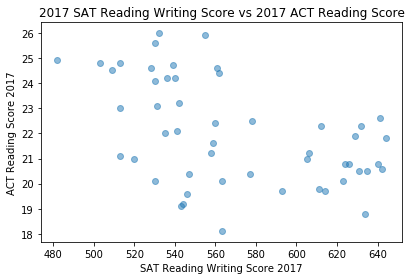

In [493]:
list_of_tuples = ['sat_read_write_2017', 'act_reading_2017' ]
title = '2017 SAT Reading Writing Score vs 2017 ACT Reading Score'
xlabel = 'SAT Reading Writing Score 2017'
ylabel = 'ACT Reading Score 2017'

subplot_scatter(final, list_of_tuples, title, xlabel, ylabel)

# SAT vs ACT Total Score- 2017

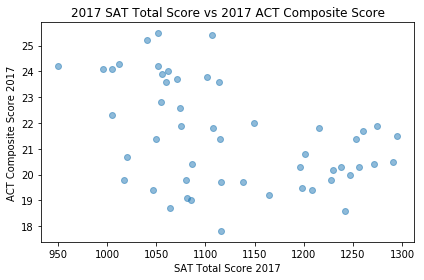

In [494]:
list_of_tuples = ['sat_total_2017', 'act_composite_2017' ]
title = '2017 SAT Total Score vs 2017 ACT Composite Score'
xlabel = 'SAT Total Score 2017'
ylabel = 'ACT Composite Score 2017'

subplot_scatter(final, list_of_tuples, title, xlabel, ylabel)

# SAT Total Score 2017 vs 2018
### If you look at the graph below, there are a handful of states that did poorly on the 2018 SAT although the state scored high in 2017. 

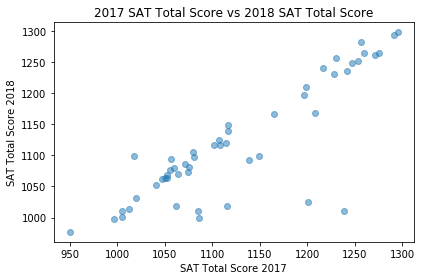

In [495]:
list_of_tuples = ['sat_total_2017', 'sat_total_2018' ]
title = '2017 SAT Total Score vs 2018 SAT Total Score'
xlabel = 'SAT Total Score 2017'
ylabel = 'SAT Total Score 2018'

subplot_scatter(final, list_of_tuples, title, xlabel, ylabel)

#positive correlation 
#does this mean the SATs are consistent and people taking them are consistent 

# ACT Composite Score 2017 vs 2018

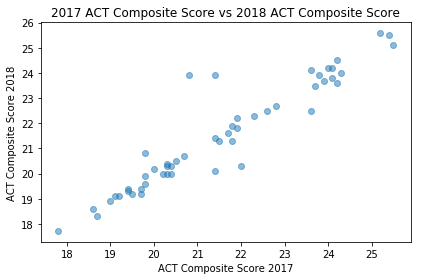

In [496]:
list_of_tuples = ['act_composite_2017', 'act_composite_2018' ]
title = '2017 ACT Composite Score vs 2018 ACT Composite Score'
xlabel = 'ACT Composite Score 2017'
ylabel = 'ACT Composite Score 2018'

subplot_scatter(final, list_of_tuples, title, xlabel, ylabel)
#positive correlation 
#does this mean the SATs are consistent and people taking them are consistent 

#### Plot and interpret boxplots

# Boxplots- Participation Rates

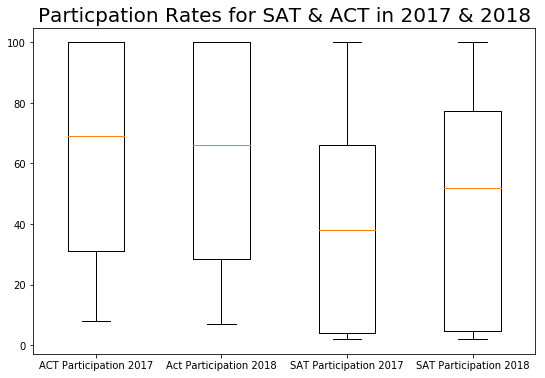

In [497]:
plot_1 = final['act_participation_2017']
plot_2 = final['act_participation_2018']
plot_3 = final['sat_participation_2017']
plot_4 = final['sat_participation_2018']

my_plots = [plot_1, plot_2, plot_3, plot_4]

fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(my_plots)

ax.set_xticklabels(['ACT Participation 2017', 'Act Participation 2018', 'SAT Participation 2017', 
                    'SAT Participation 2018'])
plt.title('Particpation Rates for SAT & ACT in 2017 & 2018', fontsize = 20);

# Boxplots- SAT Read/Write Scores 2017 vs 2018

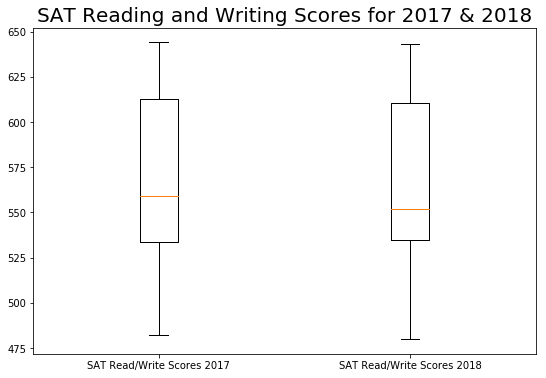

In [498]:
plot_1 = final['sat_read_write_2017']
plot_2 = final['sat_read_write_2018']

my_plots = [plot_1, plot_2]

fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(my_plots)

ax.set_xticklabels(['SAT Read/Write Scores 2017', 'SAT Read/Write Scores 2018'])
plt.title('SAT Reading and Writing Scores for 2017 & 2018', fontsize = 20);

# Boxplots- SAT Math Scores 2017 vs 2018

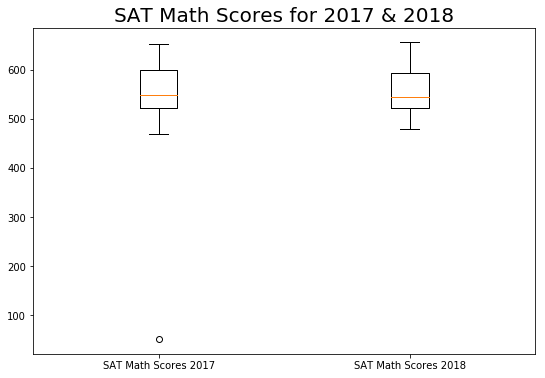

In [499]:
plot_1 = final['sat_math_2017']
plot_2 = final['sat_math_2018']

my_plots = [plot_1, plot_2]

fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(my_plots)

ax.set_xticklabels(['SAT Math Scores 2017', 'SAT Math Scores 2018'])
plt.title('SAT Math Scores for 2017 & 2018', fontsize = 20);

# Boxplots- SAT Total Scores 2017 vs 2018

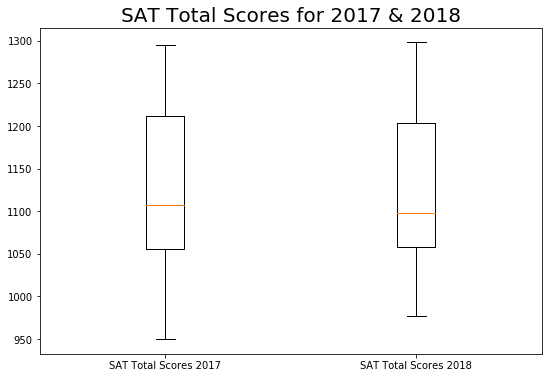

In [500]:
plot_1 = final['sat_total_2017']
plot_2 = final['sat_total_2018']

my_plots = [plot_1, plot_2]

fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(my_plots)

ax.set_xticklabels(['SAT Total Scores 2017', 'SAT Total Scores 2018'])
plt.title('SAT Total Scores for 2017 & 2018', fontsize = 20);

# Boxplots- ACT Composite Scores 2017 vs 2018

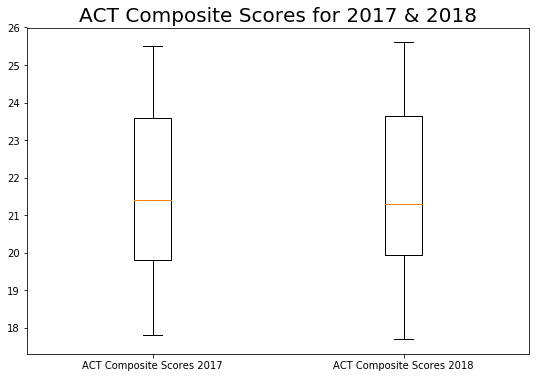

In [501]:
plot_1 = final['act_composite_2017']
plot_2 = final['act_composite_2018']

my_plots = [plot_1, plot_2]

fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(my_plots)

ax.set_xticklabels(['ACT Composite Scores 2017', 'ACT Composite Scores 2018'])
plt.title('ACT Composite Scores for 2017 & 2018', fontsize = 20);

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

**Answers:**

- For act_participation_2018, **1.** skewness: -0.026 **2.** central tendency: 61.725 **3.** standard deviation: 33.702
- For act_composite_2018, **1.** skewness: 0.264 **2.** central tendency: 21.496 **3.** standard deviation: 2.091
- For sat_participation_2018, **1.** skewness: 0.132 **2.** central tendency: 45.745 **3.** standard deviation: 36.947
- For sat_read_write_2018, **1.** skewness: 0.274 **2.** central tendency: 563.686 **3.** standard deviation: 47.035
- For sat_math_2018, **1.** skewness: 0.515 **2.** central tendency: 556.235 **3.** standard deviation: 47.302
- For sat_total_2018, **1.** skewness: 0.453 **2.** central tendency: 1120.02 **3.** standard deviation: 93.227
- For act_participation_2017, **1.** skewness: -0.192 **2.** central tendency: 65.255 **3.** standard deviation: 31.824
- For act_english_2017, **1.** skewness: 0.342 **2.** central tendency: 20.931 **3.** standard deviation: 2.33
- For act_math_2017, **1.** skewness: 0.323 **2.** central tendency: 21.182 **3.** standard deviation: 1.962
- For act_reading_2017, **1.** skewness: 0.261 **2.** central tendency: 22.014 **3.** standard deviation: 2.047
- For act_science_2017, **1.** skewness: -3.978 **2.** central tendency: 21.041 **3.** standard deviation: 3.151
- For act_composite_2017, **1.** skewness: 0.31 **2.** central tendency: 21.52 **3.** standard deviation: 2.001
- For sat_participation_2017, **1.** skewness: 0.336 **2.** central tendency: 39.804 **3.** standard deviation: 34.929
- For sat_read_write_2017, **1.** skewness: 0.265 **2.** central tendency: 569.118 **3.** standard deviation: 45.217
- For sat_math_2017, **1.** skewness: -3.853 **2.** central tendency: 547.627 **3.** standard deviation: 84.073
- For sat_total_2017, **1.** skewness: 0.302 **2.** central tendency: 1126.098 **3.** standard deviation: 91.584

### Remember to look at the distribution plots below since it correlates to the skewness of the data. 

### None of these distribution plots follow a normal distribution. 

In [502]:
import scipy.stats as stats

In [503]:
mother = ['act_participation_2018',  
'act_composite_2018',        
'sat_participation_2018',    
'sat_read_write_2018'  ,     
'sat_math_2018'   ,          
'sat_total_2018' ,           
'act_participation_2017',    
'act_english_2017' ,         
'act_math_2017' ,            
'act_reading_2017'  ,        
'act_science_2017'  ,        
'act_composite_2017' ,       
'sat_participation_2017'  ,  
'sat_read_write_2017'  ,   
'sat_math_2017' ,
'sat_total_2017']

In [504]:
stats.skew(final['act_composite_2018'])

0.2635066087178296

In [505]:
#calc skewness, central tendency, std for every numeric column
for x in mother:
    skew = stats.skew(final[x])
    central_tendency = final[x].mean()
    std = np.std(final[x])
    print(f'For {x}, 1. skewness:{round(skew,3)} 2. central tendency: {round(central_tendency,3)} 3. standard deviation: {round(std,3)}')

For act_participation_2018, 1. skewness:-0.026 2. central tendency: 61.725 3. standard deviation: 33.702
For act_composite_2018, 1. skewness:0.264 2. central tendency: 21.496 3. standard deviation: 2.091
For sat_participation_2018, 1. skewness:0.132 2. central tendency: 45.745 3. standard deviation: 36.947
For sat_read_write_2018, 1. skewness:0.274 2. central tendency: 563.686 3. standard deviation: 47.035
For sat_math_2018, 1. skewness:0.515 2. central tendency: 556.235 3. standard deviation: 47.302
For sat_total_2018, 1. skewness:0.453 2. central tendency: 1120.02 3. standard deviation: 93.227
For act_participation_2017, 1. skewness:-0.192 2. central tendency: 65.255 3. standard deviation: 31.824
For act_english_2017, 1. skewness:0.342 2. central tendency: 20.931 3. standard deviation: 2.33
For act_math_2017, 1. skewness:0.323 2. central tendency: 21.182 3. standard deviation: 1.962
For act_reading_2017, 1. skewness:0.261 2. central tendency: 22.014 3. standard deviation: 2.047
For a

# Distplot of Participation Rates

/Users/erinhwang/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


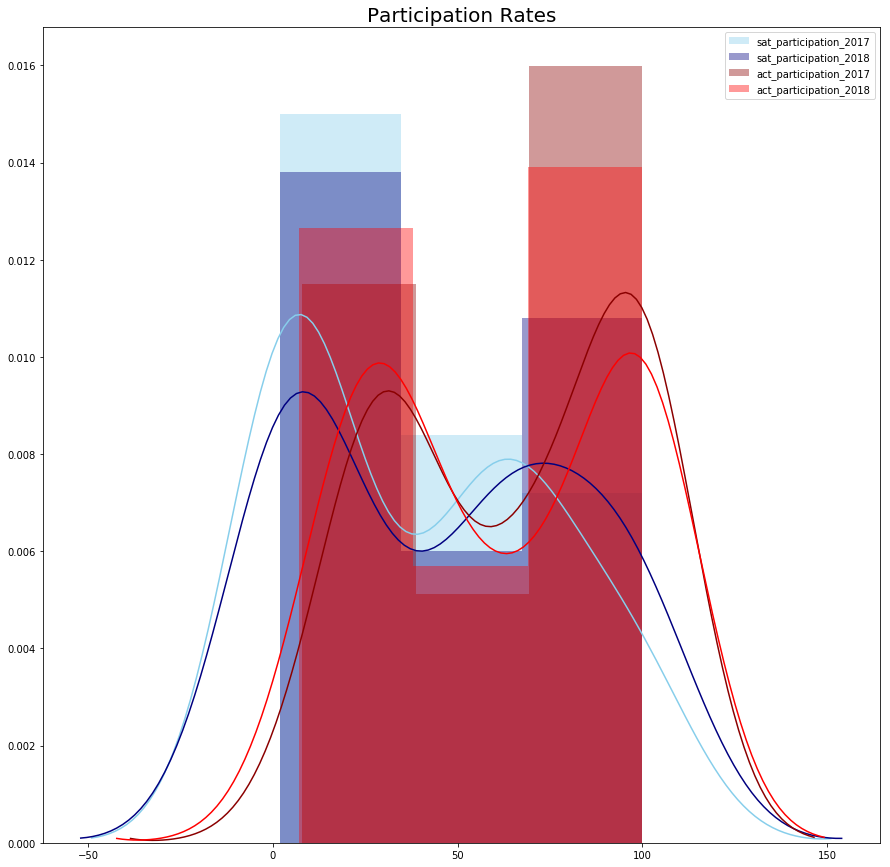

In [506]:
plt.figure(figsize = (15,15))
sns.distplot( final["sat_participation_2017"] , color="skyblue", label="sat_participation_2017")#blue tones= college board
sns.distplot( final["sat_participation_2018"] , color="navy", label="sat_participation_2018")

sns.distplot( final["act_participation_2017"] , color="darkred", label="act_participation_2017")#red tons= act
sns.distplot( final["act_participation_2018"] , color="red", label="act_participation_2018")
plt.legend()
plt.xlabel('')
plt.title('Participation Rates', fontsize = 20);




# Distplot of SAT Subject Scores

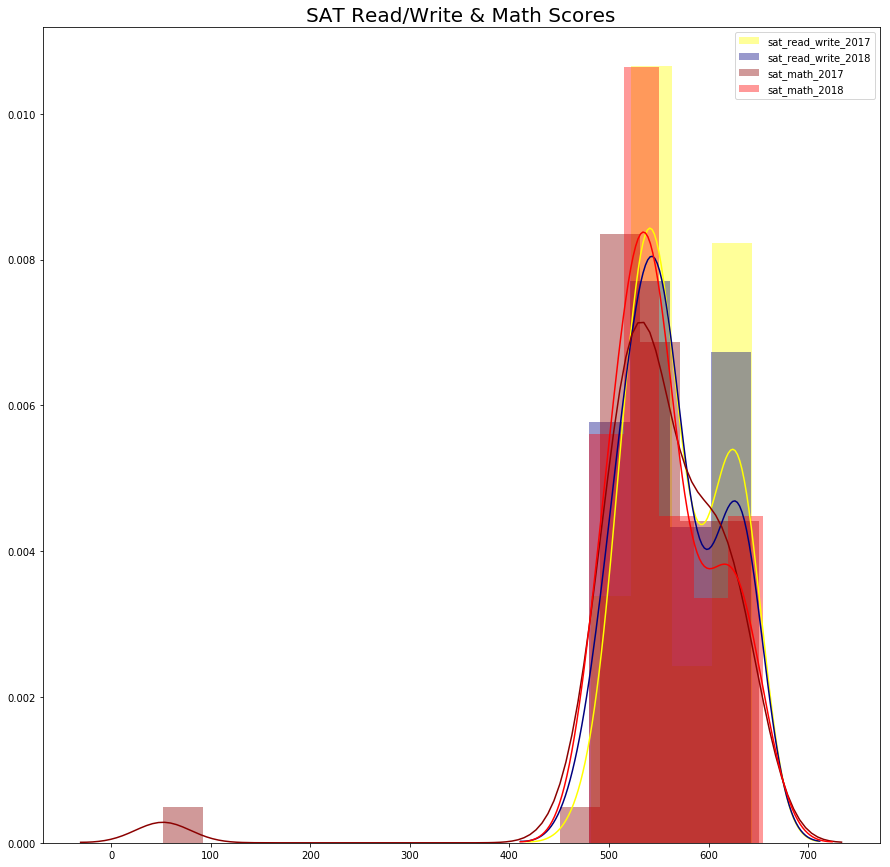

In [507]:
plt.figure(figsize = (15,15))
sns.distplot( final["sat_read_write_2017"] , color="yellow", label="sat_read_write_2017")
sns.distplot( final["sat_read_write_2018"] , color="navy", label="sat_read_write_2018")

sns.distplot( final["sat_math_2017"] , color="darkred", label="sat_math_2017")
sns.distplot( final["sat_math_2018"] , color="red", label="sat_math_2018")
plt.legend()
plt.xlabel('')
plt.title('SAT Read/Write & Math Scores', fontsize = 20);

# Distplot of SAT Total Scores

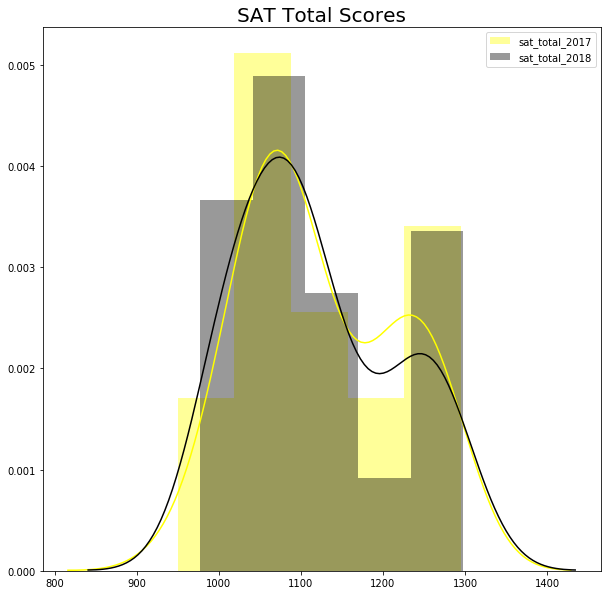

In [508]:
plt.figure(figsize = (10,10))
sns.distplot( final["sat_total_2017"] , color="yellow", label="sat_total_2017") #2017 is yellow
sns.distplot( final["sat_total_2018"] , color="black", label="sat_total_2018") #2018 is black

plt.legend()
plt.xlabel('')
plt.title('SAT Total Scores', fontsize = 20);

# Distplot of ACT 2017 Subject Scores 

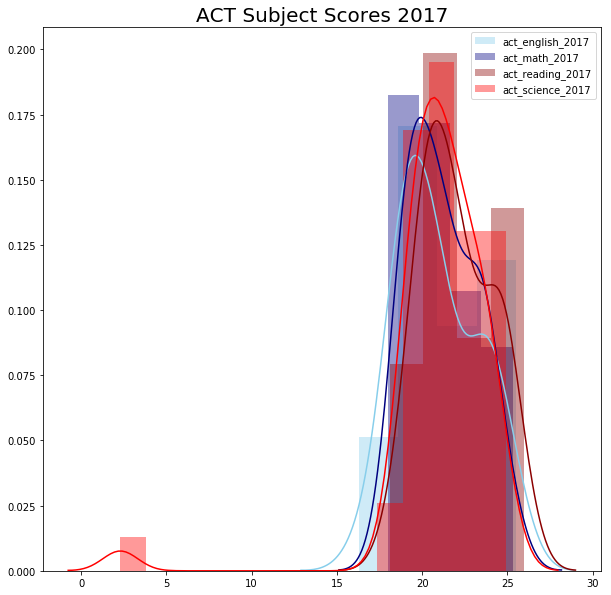

In [509]:
plt.figure(figsize = (10,10))
sns.distplot( final["act_english_2017"] , color="skyblue", label="act_english_2017")
sns.distplot( final["act_math_2017"] , color="navy", label="act_math_2017")

sns.distplot( final["act_reading_2017"] , color="darkred", label="act_reading_2017")
sns.distplot( final["act_science_2017"] , color="red", label="act_science_2017")
plt.legend()
plt.xlabel('')
plt.title('ACT Subject Scores 2017', fontsize = 20);

# Displot of ACT Composite Scores

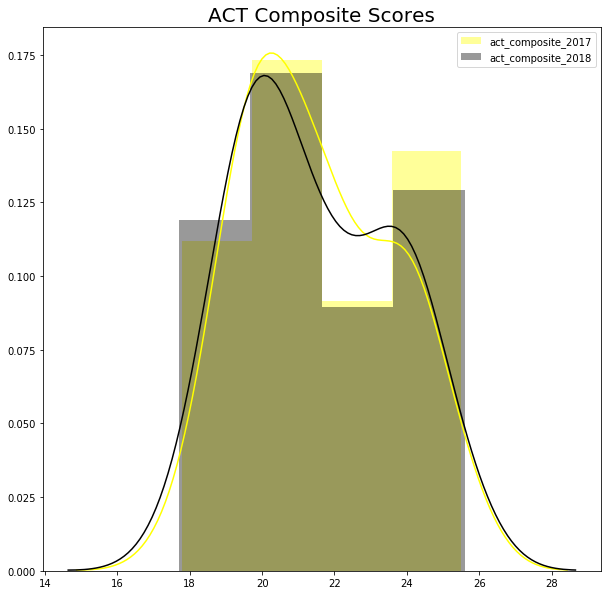

In [510]:
plt.figure(figsize = (10,10))
sns.distplot( final["act_composite_2017"] , color="yellow", label="act_composite_2017") #2017 is yellow
sns.distplot( final["act_composite_2018"] , color="black", label="act_composite_2018") #2018 is black

plt.legend()
plt.xlabel('')
plt.title('ACT Composite Scores', fontsize = 20);

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

# Normal Distribution? - SAT Math 

In [511]:
#I'm gonna treat each state as a sample since each state has the average score 

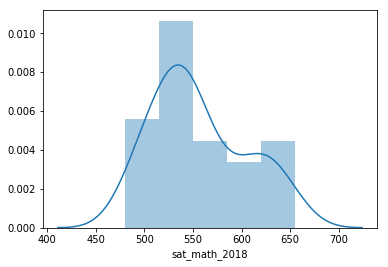

In [512]:
sns.distplot(final['sat_math_2018'])

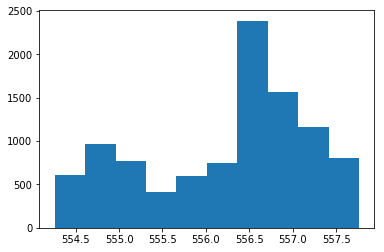

In [513]:
sample_means = []

for i in range(10_000):
    s = np.random.choice(final['sat_math_2018'], size= 50, replace=False)
    x_bar = s.mean()
    sample_means.append(x_bar)

plt.hist(sample_means);



#### When I pull 50 random scores and repeat the process 10,000 times, the central limit theorem does not apply. 

# Normal Distribution - ACT Math

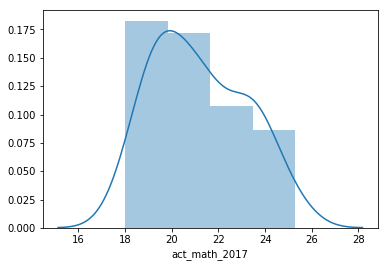

In [514]:
sns.distplot(final['act_math_2017'])

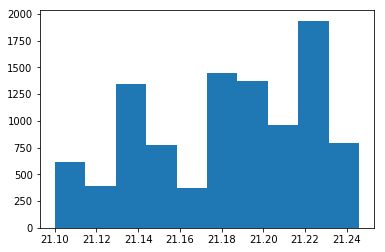

In [515]:
sample_means = []

for i in range(10_000):
    s = np.random.choice(final['act_math_2017'], size= 50, replace=False)
    x_bar = s.mean()
    sample_means.append(x_bar)

plt.hist(sample_means);



#### When I pull 50 random scores and repeat the process 10,000 times, the central limit theorem does not apply. 

# Normal Distribution- ACT Reading

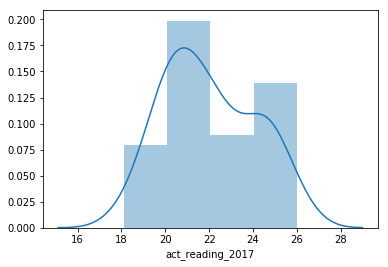

In [516]:
sns.distplot(final['act_reading_2017'])

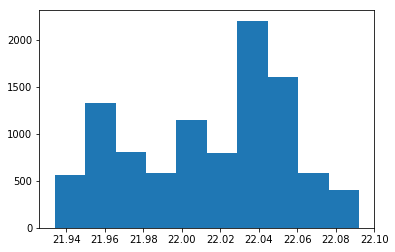

In [517]:
sample_means = []

for i in range(10_000):
    s = np.random.choice(final['act_reading_2017'], size= 50, replace=False)
    x_bar = s.mean()
    sample_means.append(x_bar)

plt.hist(sample_means);

#### When I pull 50 random scores and repeat the process 10,000 times, the central limit theorem does not apply. 

# Normal Distribution- SAT 2018 Participation Rate

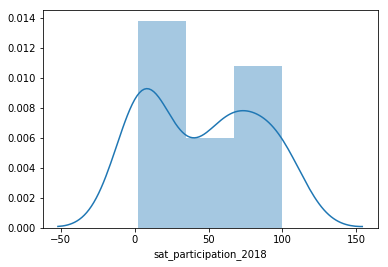

In [518]:
sns.distplot(final['sat_participation_2018'])

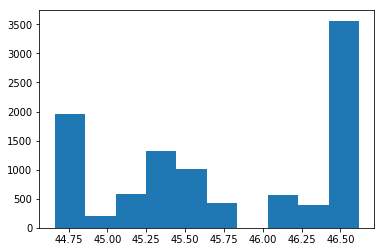

In [519]:
sample_means = []

for i in range(10_000):
    s = np.random.choice(final['sat_participation_2018'], size= 50, replace=False)
    x_bar = s.mean()
    sample_means.append(x_bar)

plt.hist(sample_means);

#### When I pull 50 random scores and repeat the process 10,000 times, the central limit theorem does not apply. 

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

----
**Answer**: No. The data collection for both the SAT and ACT are not random (state averages were computed on different circumstance varying by state). The data for both SAT and ACT scores were recorded in the class of 2018 and 2017 who
took the SAT and/or ACT during high school. Within the past 5 years, numerous states' Board of Education made it mandatory for high school students to either take the SAT or ACT to graduate high school. 

This is important since being forced to take a standardized exam may decrease one's overall score (since there are students who aren't forced to take the exam but want a superb score to get into an Ivy league, for example). This is the primary reason why higher participation rates lead to a lower average test score. In contrast, states with very low participation rates tend to have really high average scores (since students are studying hard to get into college). 

Furthermore, College Board implemented SAT School Day to specific states and districts so the SAT can be administered to high school students on a school day (mainly for graduation requirements); this mandatory exam is implemeted for ACT exams as well. 

Lastly, there isn't much granularity to conduct statistical inference between SAT and ACT participation rates. Besides the participation bias in certain states, there isn't much data on the scores. Each row (in the data) represents the state average. It would be more helpful if averages were conducted by each high school or district. 

**Sources:**

https://reports.collegeboard.org/pdf/2018-total-group-sat-suite-assessments-annual-report.pdf

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

----
**Answer**: No. The test range for both math scores are completely different. The SAT math score range is between 200 to 800 in 10 point increments while the ACT math score range is between 1 to 36 in 1 point increments. 

Even if we were to assume both math scores have the exact same range, there would be significant bias since some states have mandatory exams for graduation requirements. Some high schools who require students to take the exam for graduation offers prep exams and free after school programs to better prepare for the exam before taking the actual exam at school. This will give students the opportunity to increase their SAT or ACT math score compared to a student whose high school didn't offer prep exams and courses even though they are required to take the exam to graduate. 

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

----
**Answer**: I don't feel it's appropriate to run hypothesis tests to compare variables since this sample data is not extracted from the true population; the averages are skewed and biased due to specifc circumstances varying by state. 

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

---
### **Answer** 

**Colorado:**

- Particpation rate for the SAT skyrocketed from 11% to 100%
- The state Department of Education announced Wednesday that a selection committee chose The College Board, makers of the SAT, over the ACT testing company, which has been testing juniors in Colorado since 2001 (chalkbeat.com). 
- State Funded (aka free)
- Before initiating the SAT and ACT, the state of Colorado had PARCC tests. PARCC refers to a collection of exams administered to public school students on a yearly basis. Developed by experts from multiple states, PARCC exams are designed to measure student progress while establishing Common Core standards for grades 3-11(blog.collegevine.com)
- PARCC tests include only language arts and math. The PSAT and SAT tests cover reading, writing, math, science and social studies and are meant to measure college and workforce readiness (chalkbeat.com)

**Ohio:**

- ACT particpation rate increased from 75% to 100% 
- Board of education is paying for the ACT - Accuplacer exam didn't work
- Ohio Kettering Fairmont high school Principal Tyler Alexander said "“A few years ago we did an SAT pilot, and we had a lot of students deemed college-ready by Sinclair based on their SAT score who had not been deemed ready on the Accuplacer test." (daytondailynews.com)
- About 95 percent of districts will administer the ACT, according to state officials. (daytondailynews.com)

**Florida:**
- SAT participation decreased from 83 to 56 and ACT decreased from 77 to 66. 
- The ACT company is serving free breakfast for certain Florida school districts to encourage higher scores since Florida has a history of scoring lower than the national averages 
- Florida board of education requires high school students to pass either the FSA or SAT or ACT to graduate high school (orlandosentinel.com). 
- More than 35,000 students in the class of 2017 graduated using the alternative exams, the Florida Department of Education reported. That’s about 20 percent of the more than 168,000 teenagers who earned diplomas last spring and summer. (orlandosentinel.com)
- The FSA is considered easier since the exam consists of 10th-grade language arts and the algebra 1 end-of-course exam; thereofore, a lot of students are taking the FSA to graduate. This explains the reason why both SAT and ACT participation rates are lowering. 
- Florida board of education might implement stricter graduation requirements. 

**Sources:**

- https://www.chalkbeat.org/posts/co/2015/12/23/goodbye-act-hello-sat-a-significant-change-for-colorado-high-schoolers/
- https://blog.collegevine.com/what-is-the-parcc-test-everything-you-need-to-know/
- https://www.daytondailynews.com/news/too-much-testing-some-schools-angry-with-ohio-act-sat-mandate/5lPdirdJ68IuXs1ez7Mv7L/
- https://www.orlandosentinel.com/news/education/os-fsa-algebra-passing-scores-alternative-20180330-story.html

In [549]:
final[final['state'] == 'Florida']['act_participation_2018']

9    66
Name: act_participation_2018, dtype: int64

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

---
**Answer** 

- Alaska is the only state in 2018 where both SAT and ACT participation rates were lower than the national average.
- The average national participation rate for the ACT in 2018 is ~61%
- The average national particpation rate for the SAT in 2018 is ~45%
- Alaska's ACT participation from 2017 to 2018 dropped from 65% to 33%
- Alaska's SAT participation rate from 2017 to 2018 increased from 38% to 43% 

    *Note the SAT participation rate didn't increase as much as the ACT participation rate dropped
    
    *Note Alaska has no mandatory exit exams for high school students 
    
     **Overall:**
    
    - Alaska's average SAT total score for 2018 is ~1106; the national average for that year is ~1120
    - Alaska's average SAT total score for 2017 is ~1080; the national average for that year is ~1126
    - Alaska's average ACT composite score for 2017 is ~19; the national average for that year is ~21
    - Alaska's average ACT composite score for 2018 is ~19; the national average for that year is ~21
    
    **What is happening:**
    
    - Native American and Alaska-Native students had the lowest overall scores, an average ACT math of 17.3, and also the steadiest five-year decline of any group (according to edweek.com). 
    - Alaskan high school student on average have lower resources than that of other states (edweek.com). 
    
    **What College Board can do:**
    
    - Communicate with Alaska's Board of Education to either make it mandatory to take exam to graduate high school and/or initiate SAT Day. 
    - Give students the incentive to get better SAT scores by offering free after prep classes and free practice tests
    - Since Alaskan students on average have fewer resoures than other states, inititate a campaign where College Board offers more resources (ACT for Texas and Florida are offering free breakfast before the exam to prevent students from taking the exam hungry since those states' ACT scores are fairly lower than the national average). This initiative will increase test subject scores (leadershipbog.act.org). 
    
    Source:
    
    - https://www.edweek.org/ew/articles/2018/10/17/math-scores-slide-to-a-20-year-low.html
    - http://leadershipblog.act.org/2019/04/act-will-provide-free-breakfast-to.html

In [535]:
#these are the following national particpation average for 2018 
print(act_2018_particpation_avg)
print(sat_2018_particpation_avg)

61.72549019607843
45.745098039215684


In [534]:
#this is important
#alaska is the only current state in 2018 to have both rates lower than the average
final[(final['act_participation_2018'] < act_2018_particpation_avg) & (final['sat_participation_2018'] < sat_2018_particpation_avg)]['state']

1    Alaska
Name: state, dtype: object

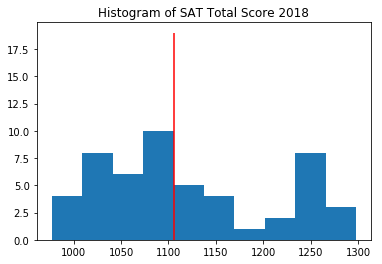

In [536]:
#plotting the average SAT total score for ALaska in 2018
plt.hist(final['sat_total_2018'])
plt.title('Histogram of SAT Total Score 2018')
plt.vlines(x = final[final['state']== 'Alaska']['sat_total_2018'], ymin = 0, ymax = 19, color = 'r')

In [538]:
#avg 2018 sat total score 
np.mean(final['sat_total_2018'])

1120.0196078431372

In [539]:
#returns Alaska's avg sat total score 2018
final[final['state']== 'Alaska']['sat_total_2018']

1    1106
Name: sat_total_2018, dtype: int64

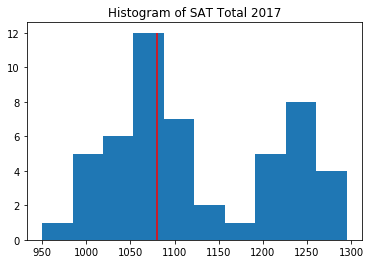

In [527]:
#plotting Alaska's avg total score for 2017
plt.hist(final['sat_total_2017'])
plt.title('Histogram of SAT Total 2017')
plt.vlines(x = final[final['state']== 'Alaska']['sat_total_2017'], ymin = 0, ymax = 12, color = 'r')

In [528]:
#national avg sat total score 2017
np.mean(final['sat_total_2017'])

1126.0980392156862

In [529]:
#alaska's avg total sat score 2017
final[final['state']== 'Alaska']['sat_total_2017']

1    1080
Name: sat_total_2017, dtype: int64

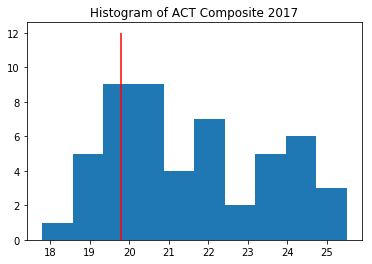

In [530]:
#alaska's act national avg composite score 2017
plt.hist(final['act_composite_2017'])
plt.title('Histogram of ACT Composite 2017')
plt.vlines(x = final[final['state']== 'Alaska']['act_composite_2017'], ymin = 0, ymax = 12, color = 'r')

In [541]:
#2017 national composite avg score 2017
np.mean(final['act_composite_2017'])

21.519607843137255

In [542]:
#2017 Alaska's composite avg score 2017
final[final['state']== 'Alaska']['act_composite_2017']

1    19.8
Name: act_composite_2017, dtype: float64

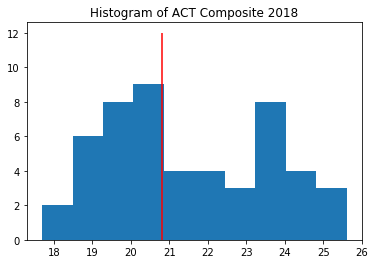

In [543]:
#alaska's act national avg composite score 2018
plt.hist(final['act_composite_2018'])
plt.title('Histogram of ACT Composite 2018')
plt.vlines(x = final[final['state']== 'Alaska']['act_composite_2018'], ymin = 0, ymax = 12, color = 'r')

In [544]:
#national composite avg score 2018
np.mean(final['act_composite_2018'])

21.49607843137255

In [545]:
#Alaska's composite avg score 2018
final[final['state']== 'Alaska']['act_composite_2017']

1    19.8
Name: act_composite_2017, dtype: float64